# Project : Anticipation of antibiotic use in the coming years

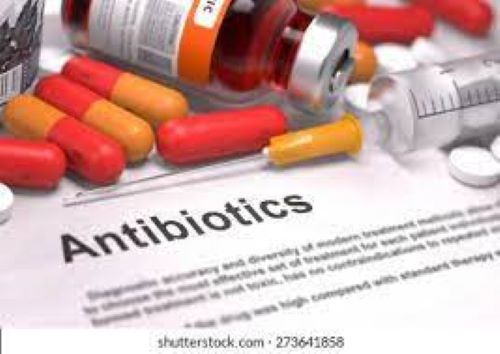

# Data Mining

 is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics. The goal of data wrangling is to assure quality and useful data. Data analysts typically spend the majority of their time in the process of data wrangling compared to the actual analysis of the data

## import all libraries needed in analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt

# Reading the dataset

We have eight data files in this project, which are as follows:
    
    1. sheet1 ---> Display 137 unique chemical names in 31 classes of 4-ATC and 9 Group 3-ATC
    
    2. sheet2 ---> number of sample hospitals in each province during 2011-2015  , 
                   number of total tertiary hospitals in each province duing 2011-2015 ,
                   proportion of sample hospitals accounting for total tertiary hospitals in each province
                   
    3. sheet3 ---> census population of each province during 2011-2015 ,
                   number of admission in total tertiary hospitals of each province during 2011-2015 , 
                   Coverage inhabitants in a given year in each province using census population data,
                   Coverage inhabitants in a given year in China using inpatient volume	
                   
    4. sheet4 ---> number of DDDs in sample hospitals during 2011-2015 , 
                   monthly DID in sample hospitals during 2011-2015
                    
    5. sheet5 ---> number of DDDs in sample hospitals during 2011-2015 (ATC-4),
                   monthly DID in sample hospitals (ATC-4）during 2011-2015
                   
    6. sheet6_1 ---> Coverage inhabitants in a given year in China using census population data	,
                     Coverage inhabitants in a given year in China using inpatient volume
                     
    7. sheet6_2 ---> number of DDDs in each region during 2011-2015 (ATC-4)
    
    8. sheet6_result ---> number of DDDs in each region during 2011-2015 (ATC-4)
    
    9.sheet7 ---> number of DDDs in different route during 2011-2015 , 
                  DID of antibiotics in different route during 2011-2015
    
    10.sheet8 ---> number of DDDs in different route in 2011&2015
                  
                
               
    

## Reading Data1

In [4]:
data1 = pd.read_excel('sheet1.xlsx')
data1

,ATC-3（n=9）,ATC-4（n=31）,drug（n=173）
0,J01A,J01AA,Doxycycline
1,J01A,J01AA,Guamecycline
2,J01A,J01AA,Metacycline
3,J01A,J01AA,Minocycline
4,J01A,J01AA,Tetracycline
...,...,...,...
168,J01X,J01XX,Linezolid
169,J01X,J01XX,Fosfomycin
170,J01X,J01XX,Fosfomycin Calcium
171,J01X,J01XX,Fosfomycin Calcium and Trimethoprim


## Exploring general properties about the data1

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ATC-3（n=9）   173 non-null    object
 1   ATC-4（n=31）  173 non-null    object
 2   drug（n=173）  173 non-null    object
dtypes: object(3)
memory usage: 4.2+ KB


In [6]:
data1.describe()

,ATC-3（n=9）,ATC-4（n=31）,drug（n=173）
count,173,173,173
unique,9,31,172
top,J01D,J01DD,Spiramycin
freq,54,21,2


In [4]:
data1.shape

(173, 3)

Outcomes:

1. this shows that we have 3 columns in total besides index, and we have 173 record.
2. None of the data fields have NULL values.


In [6]:
data1.duplicated().sum()

1

Outcomes:
    
    We have a duplicate line that should be removed from our data

In [7]:
data1 = data1.drop_duplicates()
data1.duplicated().sum()
data1

,ATC-3（n=9）,ATC-4（n=31）,drug（n=173）
0,J01A,J01AA,Doxycycline
1,J01A,J01AA,Guamecycline
2,J01A,J01AA,Metacycline
3,J01A,J01AA,Minocycline
4,J01A,J01AA,Tetracycline
...,...,...,...
168,J01X,J01XX,Linezolid
169,J01X,J01XX,Fosfomycin
170,J01X,J01XX,Fosfomycin Calcium
171,J01X,J01XX,Fosfomycin Calcium and Trimethoprim


Outcomes:
     
        We deleted duplicate rows and now we have 172 rows and 3 columns

## Checking the missing data1

In [8]:
data1.isnull().sum().sort_values(ascending= False)

ATC-3（n=9）     0
ATC-4（n=31）    0
drug（n=173）    0
dtype: int64

Outcomes:
    
    There is no missing data in our data

In [9]:
data1_group = data1.groupby(['ATC-3（n=9）' ,'ATC-4（n=31）' ]).sum()
data1_group

drug（n=173）
ATC-3（n=9） ATC-4（n=31）                                                   
J01A       J01AA        DoxycyclineGuamecyclineMetacyclineMinocyclineT...
J01B       J01BA        Thiamphenicol Thiamphenicol GlycinateChloramph...
J01C       J01CA        Azlocillin SodiumAmoxicillinAmpicillinFurbenic...
           J01CE        Benzathine penicillinNafcillin SodiumProcaine ...
           J01CF        Oxacillin SodiumFlucloxacillin SodiumLenampici...
           J01CG                                        Sulbactam Sodium 
           J01CR        Amoxicillin and FlucloxacillinAmoxiciliin and ...
J01D       J01DA                                        Cefetamet Pivoxil
           J01DB        CefalexinCefalexin and Trimethoprin CefradineC...
           J01DC        Compound CefaclorCefprozilCefuroxime SodiumCef...
           J01DD        Latamoxef SodiumCefpodoxime ProxetilCeftibuten...
           J01DE                Flomoxef SodiumCefepimeCefpiromeCefoselis
           J01DF                                                Aztreonam
           J01DH        BiapenemErtapenem SodiumMeropenemPanipenem and...
           J01DI                                         Faropenem Sodium
J01E       J01EA                                            Trimethoprim 
           J01EB        Sulfaii Lamidum CrtstallinumSulfamethoxazole, ...
           J01EC        Sulfamethoxazole and TrimethoprimSulfamethoxaz...
           J01EE        Belladonna Sulfamethoxazole and TrimerhoprimCo...
J01F       J01FA        AzithromycinDirithroomycinErythromycinErythrom...
           J01FF        ClindamycinClindamycin Palmitate Hydrochloride...
           J01FG                             KitasamycinAcetylkitasamycin
J01G       J01GA                                             Streptomycin
           J01GB        AmikacinAmikacini SulfatisKanamycinNetilmicinG...
J01M       J01MA        AntofloxacinBalofloxacinFleroxacinCiprofloxaci...
J01X       J01XA                       NorvancomycinTeicoplaninVancomycin
           J01XB                                                 Colistin
           J01XC                                          Sodium Fusidate
           J01XD        OrnidazoleMetronidazoleMorinidazoleTinidazoleL...
           J01XE                               NitrofurantoinFurazolidone
           J01XX        DaptomycinSpectinomycinLinezolidFosfomycinFosf...

## Reading Data2

In [10]:
data2 = pd.read_excel('sheet2.xlsx')
data2

,Province,simple_hospital,hos_2011,hos_2012,hos_2013,hos_2014,hos_2015,prop_2011,prop_2012,prop_2013,prop_2014,prop_2015
0,Anhui,7,35,36,37,53,54,0.200000,0.194444,0.189189,0.132075,0.129630
1,Beijing,31,50,50,62,68,77,0.620000,0.620000,0.500000,0.455882,0.402597
2,Fujian,19,40,52,53,52,56,0.475000,0.365385,0.358491,0.365385,0.339286
3,Gansu,1,30,34,35,35,37,0.033333,0.029412,0.028571,0.028571,0.027027
4,Guangdong,52,90,105,117,128,141,0.577778,0.495238,0.444444,0.406250,0.368794
5,Guangxi,2,49,50,53,55,59,0.040816,0.040000,0.037736,0.036364,0.033898
6,Guizhou,7,24,38,40,44,42,0.291667,0.184211,0.175000,0.159091,0.166667
7,Hebei,15,43,55,56,58,67,0.348837,0.272727,0.267857,0.258621,0.223881
8,Henan,17,55,85,82,85,82,0.309091,0.200000,0.207317,0.200000,0.207317
9,Helongjiang,28,70,77,77,82,87,0.400000,0.363636,0.363636,0.341463,0.321839


## Exploring general properties about the data2

In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Province         28 non-null     object 
 1   simple_hospital  28 non-null     int64  
 2   hos_2011         28 non-null     int64  
 3   hos_2012         28 non-null     int64  
 4   hos_2013         28 non-null     int64  
 5   hos_2014         28 non-null     int64  
 6   hos_2015         28 non-null     int64  
 7   prop_2011        28 non-null     float64
 8   prop_2012        28 non-null     float64
 9   prop_2013        28 non-null     float64
 10  prop_2014        28 non-null     float64
 11  prop_2015        28 non-null     float64
dtypes: float64(5), int64(6), object(1)
memory usage: 2.8+ KB


In [12]:
data2.describe()

,simple_hospital,hos_2011,hos_2012,hos_2013,hos_2014,hos_2015,prop_2011,prop_2012,prop_2013,prop_2014,prop_2015
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,16.714286,47.571429,54.750000,59.464286,64.750000,68.964286,0.352428,0.310653,0.284805,0.264172,0.245434
std,11.658274,22.366358,26.857132,29.765108,33.595221,35.501155,0.208459,0.192104,0.174939,0.169337,0.150934
min,1.000000,4.000000,4.000000,5.000000,7.000000,7.000000,0.033333,0.029412,0.028571,0.028571,0.027027
25%,7.000000,33.750000,37.750000,41.500000,44.000000,46.250000,0.228956,0.187142,0.166667,0.133980,0.128718
50%,16.500000,44.500000,49.000000,51.000000,52.500000,57.000000,0.307487,0.261366,0.251919,0.243345,0.225975
75%,24.250000,61.750000,77.000000,78.250000,83.500000,89.750000,0.477083,0.394872,0.383792,0.362623,0.341199
max,52.000000,90.000000,105.000000,117.000000,128.000000,141.000000,0.888889,0.727273,0.727273,0.695652,0.571429


In [13]:
data2.shape

(28, 12)

Outcomes:
    
    1.this shows that we have 12 columns in total besides index, and we have 28 record.
    2.None of the data fields have NULL values.


In [14]:
data2.duplicated().sum()

0

Outcomes:
       There is no duplicate rows in this dataset.

Outcomes:
    
    1. There are 28 hospitals in total
    2. The minimum number of sample hospitals is one hospital and the maximum number of sample hospitals is 52                hospitals
    3. According to the average, in 2015, there were the most hospitals in 28 cities

## Checking the missing data2

In [15]:
data2.isnull().sum().sort_values(ascending= False)

Province           0
simple_hospital    0
hos_2011           0
hos_2012           0
hos_2013           0
hos_2014           0
hos_2015           0
prop_2011          0
prop_2012          0
prop_2013          0
prop_2014          0
prop_2015          0
dtype: int64

Outcomes:

There is no missing data in our data

## Reading Data3

In [16]:
data3 = pd.read_excel('sheet3.xlsx')
data3

,province,population_2011,population_2012,population_2013,population_2014,population_2015,admission_hos_2011,admission_hos_2012,admission_hos_2013,admission_hos_2014,...,Coverage_population _2011,Coverage_population _2012,Coverage_population _2013,Coverage_population _2014,Coverage_population _2015,coverage_inpatient _2011,coverage_inpatient _2012,coverage_inpatient _2013,coverage_inpatient _2014,coverage_inpatient _2015
0,Anhui,59680000,59880000,60300000,60830000,61440000,6.844398e+06,7.771417e+06,8.691056e+06,8.942269e+06,...,4.125607e+06,4.323822e+06,4.438747e+06,3.287317e+06,3.380931e+06,1.368880e+06,1.511109e+06,1.644254e+06,1.181054e+06,1.333379e+06
1,Beijing,20190000,20690000,21150000,21520000,21710000,1.084042e+07,1.245919e+07,1.386298e+07,1.323625e+07,...,4.326702e+06,4.763680e+06,4.114595e+06,4.014179e+06,3.710322e+06,6.721059e+06,7.724700e+06,6.931488e+06,6.034175e+06,6.209811e+06
2,Fujian,37200000,37480000,37740000,38060000,38390000,7.956815e+06,9.090434e+06,9.879155e+06,9.448846e+06,...,6.107529e+06,5.085578e+06,5.264127e+06,5.690111e+06,5.529227e+06,3.779487e+06,3.321505e+06,3.541584e+06,3.452463e+06,3.594240e+06
3,Gansu,25640000,25780000,25820000,25910000,26000000,3.277425e+06,3.953163e+06,4.250470e+06,4.244607e+06,...,2.954104e+05,2.815752e+05,2.870350e+05,3.029012e+05,2.982994e+05,1.092475e+05,1.162695e+05,1.214420e+05,1.212745e+05,1.340629e+05
4,Guangdong,105050000,105940000,106440000,107240000,108490000,3.147518e+07,3.416453e+07,3.654422e+07,3.469570e+07,...,2.097905e+07,1.948339e+07,1.840641e+07,1.782592e+07,1.698458e+07,1.818566e+07,1.691958e+07,1.624187e+07,1.409513e+07,1.453602e+07
5,Guangxi,46450000,46820000,47190000,47540000,47960000,7.524551e+06,8.519974e+06,9.404718e+06,9.200258e+06,...,6.553128e+05,6.954755e+05,6.928685e+05,7.073399e+05,6.901411e+05,3.071245e+05,3.407990e+05,3.548950e+05,3.345548e+05,3.641641e+05
6,Guizhou,34690000,34840000,35020000,35080000,35300000,3.204069e+06,3.727134e+06,4.365191e+06,4.474509e+06,...,3.497197e+06,2.383324e+06,2.384520e+06,2.283529e+06,2.497493e+06,9.345202e+05,6.865774e+05,7.639084e+05,7.118537e+05,8.983083e+05
7,Hebei,72410000,72880000,73330000,73840000,74250000,9.469272e+06,1.078515e+07,1.187686e+07,1.182824e+07,...,8.730726e+06,7.381207e+06,7.642433e+06,7.813698e+06,7.056570e+06,3.303234e+06,2.941404e+06,3.181302e+06,3.059027e+06,3.036671e+06
8,Henan,93880000,94060000,94130000,94360000,94800000,1.308945e+07,1.526761e+07,1.677809e+07,1.701896e+07,...,1.002971e+07,6.985949e+06,7.592938e+06,7.721818e+06,8.343037e+06,4.045829e+06,3.053522e+06,3.478384e+06,3.403791e+06,3.939935e+06
9,Helongjiang,38340000,38340000,38350000,38330000,38120000,5.620346e+06,6.311141e+06,6.868879e+06,6.672713e+06,...,5.300796e+06,5.177378e+06,5.425995e+06,5.355311e+06,5.208017e+06,2.248138e+06,2.294960e+06,2.497774e+06,2.278487e+06,2.426595e+06


## Exploring general properties about the data3

In [17]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   province                   28 non-null     object 
 1    population_2011           28 non-null     int64  
 2    population_2012           28 non-null     int64  
 3    population_2013           28 non-null     int64  
 4    population_2014           28 non-null     int64  
 5    population_2015           28 non-null     int64  
 6   admission_hos_2011         28 non-null     float64
 7   admission_hos_2012         28 non-null     float64
 8   admission_hos_2013         28 non-null     float64
 9   admission_hos_2014         28 non-null     float64
 10  admission_hos_2015         28 non-null     float64
 11  Coverage_population _2011  28 non-null     float64
 12  Coverage_population _2012  28 non-null     float64
 13  Coverage_population _2013  28 non-null     float64
 

Outcomes:
    
    1. this shows that we have 21 columns in total besides index, and we have 28 record.
    2.None of the data fields have NULL values.
   

In [18]:
data3.describe()

,population_2011,population_2012,population_2013,population_2014,population_2015,admission_hos_2011,admission_hos_2012,admission_hos_2013,admission_hos_2014,admission_hos_2015,Coverage_population _2011,Coverage_population _2012,Coverage_population _2013,Coverage_population _2014,Coverage_population _2015,coverage_inpatient _2011,coverage_inpatient _2012,coverage_inpatient _2013,coverage_inpatient _2014,coverage_inpatient _2015
count,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01
mean,4.724786e+07,4.750750e+07,4.776107e+07,4.801500e+07,4.830893e+07,8.742851e+06,9.950997e+06,1.054107e+07,1.065697e+07,1.229690e+07,5.639939e+06,5.292529e+06,5.130036e+06,4.975763e+06,4.840388e+06,3.336599e+06,3.322404e+06,3.130770e+06,2.952623e+06,3.155664e+06
std,2.606544e+07,2.614490e+07,2.619482e+07,2.630744e+07,2.649963e+07,6.194475e+06,6.912258e+06,7.596300e+06,7.133540e+06,8.182467e+06,4.526109e+06,4.299947e+06,4.043828e+06,3.870087e+06,3.710808e+06,3.579465e+06,3.490048e+06,3.272914e+06,2.889274e+06,3.007468e+06
min,6.390000e+06,6.470000e+06,6.540000e+06,6.620000e+06,6.680000e+06,1.349601e+06,1.559966e+06,1.755418e+06,1.721623e+06,1.956748e+06,2.954104e+05,2.815752e+05,2.870350e+05,3.029012e+05,2.982994e+05,1.092475e+05,1.162695e+05,1.214420e+05,1.212745e+05,1.340629e+05
25%,2.702750e+07,2.707000e+07,2.708750e+07,2.711750e+07,2.714750e+07,4.378849e+06,5.067923e+06,5.471986e+06,5.631446e+06,6.636677e+06,2.773075e+06,2.314977e+06,2.273403e+06,2.214943e+06,2.347882e+06,9.111382e+05,8.815052e+05,8.548815e+05,8.230493e+05,9.109255e+05
50%,4.108500e+07,4.111500e+07,4.112500e+07,4.112000e+07,4.110500e+07,7.184474e+06,8.145696e+06,8.505995e+06,9.071264e+06,1.043981e+07,4.531612e+06,4.543751e+06,4.276671e+06,4.055908e+06,4.103595e+06,2.666953e+06,2.576888e+06,2.524658e+06,2.453292e+06,2.722987e+06
75%,6.125000e+07,6.150750e+07,6.195250e+07,6.246500e+07,6.303750e+07,1.113247e+07,1.267447e+07,1.395959e+07,1.335832e+07,1.558866e+07,7.420936e+06,6.504213e+06,6.617482e+06,6.299570e+06,6.128697e+06,4.142759e+06,4.107106e+06,4.069864e+06,3.715407e+06,4.056285e+06
max,1.050500e+08,1.059400e+08,1.064400e+08,1.072400e+08,1.084900e+08,3.147518e+07,3.416453e+07,3.654422e+07,3.469570e+07,3.941497e+07,2.097905e+07,1.948339e+07,1.840641e+07,1.782592e+07,1.698458e+07,1.818566e+07,1.691958e+07,1.624187e+07,1.409513e+07,1.453602e+07


Outcomes:
    
    1.According to the average, the largest population was in 2015
    2.The larger the population, the greater the volume of hospitalization
    3.Residents coverage in 2014 and 2015 was lower than their population in 2011, 2012 and 2013.

In [19]:
data3.shape

(28, 21)

In [20]:
data3.duplicated().sum()

0

Outcomes:
       There is no duplicate rows in this dataset.

## Checking the missing data3

In [21]:
data3.isnull().sum().sort_values(ascending= False)

province                     0
Coverage_population _2011    0
coverage_inpatient _2014     0
coverage_inpatient _2013     0
coverage_inpatient _2012     0
coverage_inpatient _2011     0
Coverage_population _2015    0
Coverage_population _2014    0
Coverage_population _2013    0
Coverage_population _2012    0
admission_hos_2015           0
 population_2011             0
admission_hos_2014           0
admission_hos_2013           0
admission_hos_2012           0
admission_hos_2011           0
 population_2015             0
 population_2014             0
 population_2013             0
 population_2012             0
coverage_inpatient _2015     0
dtype: int64

Outcomes:

There is no missing data in our data

## Reading Data4

In [22]:
data4 = pd.read_excel('sheet4.xlsx')
data4

,Unnamed: 0,DDD_sam_hos_2011_1,DDD_sam_hos_2011_2,DDD_sam_hos_2011_3,DDD_sam_hos_2011_4,DDD_sam_hos_2011_5,DDD_sam_hos_2011_6,DDD_sam_hos_2011_7,DDD_sam_hos_2011_8,DDD_sam_hos_2011_9,...,DID_sam_hos_2015_3,DID_sam_hos_2015_4,DID_sam_hos_2015_5,DID_sam_hos_2015_6,DID_sam_hos_2015_7,DID_sam_hos_2015_8,DID_sam_hos_2015_9,DID_sam_hos_2015_10,DID_sam_hos_2015_11,DID_sam_hos_2015_12
0,J01A,8.084320e+05,616620.000,8.027550e+05,7.367257e+05,1.038556e+06,7.238450e+05,1.167220e+06,1.165530e+06,1.333814e+06,...,0.184899,0.236749,0.307929,0.268095,0.300395,0.314844,0.308779,0.294813,0.304965,0.393283
1,J01B,8.217800e+04,45122.249,8.642358e+04,9.256167e+04,7.352033e+04,7.429350e+04,8.966634e+04,6.340000e+04,6.332317e+04,...,0.002704,0.006788,0.005336,0.006474,0.008339,0.006068,0.007435,0.005639,0.006024,0.008865
2,J01C,1.317138e+07,6687186.072,8.594179e+06,1.117568e+07,8.234010e+06,8.282472e+06,8.557107e+06,9.758167e+06,1.046160e+07,...,2.018241,3.107757,2.519925,2.658312,2.625922,2.620845,3.997726,1.935133,3.080038,3.677181
3,J01D,1.658930e+07,9121358.832,1.318982e+07,1.531813e+07,1.294562e+07,1.193091e+07,1.174360e+07,1.207549e+07,1.235506e+07,...,2.664472,3.187397,2.934550,3.253433,3.249679,2.944264,3.243474,2.489659,2.952553,3.391188
4,J01E,1.252445e+05,66476.741,7.875499e+04,9.967167e+04,8.130689e+04,7.200896e+04,1.183017e+05,1.021783e+05,1.105672e+05,...,0.024655,0.029771,0.025113,0.030417,0.036465,0.037790,0.042671,0.045342,0.038483,0.044094
5,J01F,7.905437e+06,4538117.818,6.127445e+06,6.926727e+06,6.072936e+06,5.417330e+06,5.252988e+06,5.548079e+06,5.894362e+06,...,1.245298,1.504597,1.395325,1.442068,1.487503,1.429751,1.515873,1.247972,1.532155,1.784660
6,J01G,1.071340e+06,540794.451,7.374910e+05,9.090209e+05,7.960308e+05,7.261352e+05,7.493530e+05,7.812584e+05,7.446833e+05,...,0.116579,0.154859,0.147147,0.154242,0.157660,0.153224,0.176539,0.105333,0.129606,0.151149
7,J01M,5.763454e+06,3398760.750,5.051867e+06,5.074209e+06,4.407540e+06,4.271899e+06,3.956630e+06,3.965324e+06,4.112592e+06,...,1.017978,1.080407,1.004443,1.051242,1.152432,1.044965,1.149064,0.831318,0.991483,1.137108
8,J01X,4.856060e+06,2528354.468,3.415143e+06,4.252212e+06,3.797565e+06,3.792411e+06,3.994128e+06,4.056245e+06,4.137346e+06,...,0.815358,1.126035,0.987857,1.172923,1.312243,1.199103,1.157523,0.903940,1.149481,1.254114


## Exploring general properties about the data4

In [23]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Columns: 121 entries, Unnamed: 0 to DID_sam_hos_2015_12
dtypes: float64(120), object(1)
memory usage: 8.6+ KB


In [24]:
data4.describe()

,DDD_sam_hos_2011_1,DDD_sam_hos_2011_2,DDD_sam_hos_2011_3,DDD_sam_hos_2011_4,DDD_sam_hos_2011_5,DDD_sam_hos_2011_6,DDD_sam_hos_2011_7,DDD_sam_hos_2011_8,DDD_sam_hos_2011_9,DDD_sam_hos_2011_10,...,DID_sam_hos_2015_3,DID_sam_hos_2015_4,DID_sam_hos_2015_5,DID_sam_hos_2015_6,DID_sam_hos_2015_7,DID_sam_hos_2015_8,DID_sam_hos_2015_9,DID_sam_hos_2015_10,DID_sam_hos_2015_11,DID_sam_hos_2015_12
count,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,5.596981e+06,3.060310e+06,4.231542e+06,4.953883e+06,4.160787e+06,3.921256e+06,3.958777e+06,4.168407e+06,4.357039e+06,3.372878e+06,...,0.898909,1.159373,1.036403,1.115245,1.147849,1.083428,1.288787,0.873239,1.131643,1.315738
std,5.998676e+06,3.218034e+06,4.508462e+06,5.383639e+06,4.359348e+06,4.117046e+06,4.050259e+06,4.324349e+06,4.505038e+06,3.642681e+06,...,0.948724,1.250017,1.080698,1.178694,1.171383,1.099501,1.442205,0.883597,1.195921,1.399629
min,8.217800e+04,4.512225e+04,7.875499e+04,9.256167e+04,7.352033e+04,7.200896e+04,8.966634e+04,6.340000e+04,6.332317e+04,4.654092e+04,...,0.002704,0.006788,0.005336,0.006474,0.008339,0.006068,0.007435,0.005639,0.006024,0.008865
25%,8.084320e+05,5.407945e+05,7.374910e+05,7.367257e+05,7.960308e+05,7.238450e+05,7.493530e+05,7.812584e+05,7.446833e+05,5.203351e+05,...,0.116579,0.154859,0.147147,0.154242,0.157660,0.153224,0.176539,0.105333,0.129606,0.151149
50%,4.856060e+06,2.528354e+06,3.415143e+06,4.252212e+06,3.797565e+06,3.792411e+06,3.956630e+06,3.965324e+06,4.112592e+06,2.919028e+06,...,0.815358,1.080407,0.987857,1.051242,1.152432,1.044965,1.149064,0.831318,0.991483,1.137108
75%,7.905437e+06,4.538118e+06,6.127445e+06,6.926727e+06,6.072936e+06,5.417330e+06,5.252988e+06,5.548079e+06,5.894362e+06,4.836822e+06,...,1.245298,1.504597,1.395325,1.442068,1.487503,1.429751,1.515873,1.247972,1.532155,1.784660
max,1.658930e+07,9.121359e+06,1.318982e+07,1.531813e+07,1.294562e+07,1.193091e+07,1.174360e+07,1.207549e+07,1.235506e+07,9.867627e+06,...,2.664472,3.187397,2.934550,3.253433,3.249679,2.944264,3.997726,2.489659,3.080038,3.677181


In [25]:
data4.shape

(9, 121)

Outcomes:
    
    1. this shows that we have 121 columns in total besides index, and we have 9 record.
    2. None of the data fields have NULL values.

In [26]:
data4.duplicated().sum()

0


Outcomes:

 We have no duplicate lines

## Checking the missing data4

In [27]:
data4.isnull().sum().sort_values(ascending= False)

Unnamed: 0             0
DID_sam_hos_2011_1     0
DID_sam_hos_2013_5     0
DID_sam_hos_2013_4     0
DID_sam_hos_2013_3     0
                      ..
DDD_sam_hos_2013_12    0
DDD_sam_hos_2013_11    0
DDD_sam_hos_2013_10    0
DDD_sam_hos_2013_9     0
DID_sam_hos_2015_12    0
Length: 121, dtype: int64

In [28]:
data4.isnull().sum().sum()

0

## Reading Data5

In [29]:
data5 = pd.read_excel('sheet5.xlsx')
data5

,province,DDD_sam_hos_2011_1,DDD_sam_hos_2011_2,DDD_sam_hos_2011_3,DDD_sam_hos_2011_4,DDD_sam_hos_2011_5,DDD_sam_hos_2011_6,DDD_sam_hos_2011_7,DDD_sam_hos_2011_8,DDD_sam_hos_2011_9,...,DID_sam_hos_2015_3,DID_sam_hos_2015_4,DID_sam_hos_2015_5,DID_sam_hos_2015_6,DID_sam_hos_2015_7,DID_sam_hos_2015_8,DID_sam_hos_2015_9,DID_sam_hos_2015_10,DID_sam_hos_2015_11,DID_sam_hos_2015_12
0,J01AA,808432.000,616620.000,802755.000,736725.667,1038556.000,723845.000,1167219.667,1165529.666,1333814.333,...,0.184899,0.236749,0.307929,0.268095,0.300395,0.314844,0.308779,0.294813,0.304965,0.393283
1,J01BA,82178.000,45122.249,86423.583,92561.667,73520.334,74293.503,89666.335,63400.003,63323.169,...,0.002704,0.006788,0.005336,0.006474,0.008339,0.006068,0.007435,0.005639,0.006024,0.008865
2,J01CA,2293639.733,1157493.301,1548117.088,1671628.510,1444498.204,1283683.827,1265475.677,1373339.416,1585013.164,...,0.327415,0.402661,0.325492,0.351856,0.382034,0.369357,0.432951,0.302966,0.417773,0.484667
3,J01CE,1581290.866,696282.870,1330648.932,1363893.906,1482620.945,1408506.184,1792598.954,1576149.343,1629072.505,...,0.278975,0.459398,0.397189,0.406278,0.496883,0.481403,0.468047,0.361268,0.507047,0.417484
4,J01CF,127553.930,61136.109,90434.895,115792.608,110954.716,111405.072,111026.144,103143.679,86224.215,...,0.017380,0.023392,0.022611,0.026684,0.026342,0.021986,0.023989,0.017249,0.019695,0.021520
5,J01CG,5972.500,2862.500,7289.500,6653.000,8070.000,5199.000,8319.500,5678.500,6732.500,...,0.000264,0.000183,0.000242,0.000333,0.000231,0.000289,0.000295,0.000312,0.000220,0.000453
6,J01CR,9162924.181,4769411.292,5617689.068,8017712.683,5187866.118,5473677.823,5379686.686,6699855.812,7154556.420,...,1.394207,2.222122,1.774392,1.873161,1.720432,1.747810,3.072444,1.253339,2.135304,2.753057
7,J01DA,406202.703,197234.987,329457.313,364176.170,364026.142,296373.484,238974.207,192321.183,159280.111,...,0.012918,0.014472,0.012866,0.015095,0.014919,0.016423,0.022249,0.011034,0.019047,0.022413
8,J01DB,2058451.515,1104342.020,1533168.023,1815438.191,1527030.980,1469634.966,1492318.836,1498222.828,1526863.579,...,0.249204,0.310246,0.299866,0.324435,0.330858,0.303423,0.327536,0.238745,0.301642,0.321758
9,J01DC,7040602.997,3834669.059,5369482.610,6185900.906,5131659.714,4834858.283,4903105.520,5246151.450,5461339.370,...,1.184027,1.435343,1.324744,1.458398,1.409178,1.268537,1.388881,1.058658,1.238817,1.440175


## Exploring general properties about the data5

In [30]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Columns: 121 entries, province to DID_sam_hos_2015_12
dtypes: float64(120), object(1)
memory usage: 29.4+ KB


In [31]:
data5.describe()

,DDD_sam_hos_2011_1,DDD_sam_hos_2011_2,DDD_sam_hos_2011_3,DDD_sam_hos_2011_4,DDD_sam_hos_2011_5,DDD_sam_hos_2011_6,DDD_sam_hos_2011_7,DDD_sam_hos_2011_8,DDD_sam_hos_2011_9,DDD_sam_hos_2011_10,...,DID_sam_hos_2015_3,DID_sam_hos_2015_4,DID_sam_hos_2015_5,DID_sam_hos_2015_6,DID_sam_hos_2015_7,DID_sam_hos_2015_8,DID_sam_hos_2015_9,DID_sam_hos_2015_10,DID_sam_hos_2015_11,DID_sam_hos_2015_12
count,3.100000e+01,3.100000e+01,3.100000e+01,3.000000e+01,3.100000e+01,3.100000e+01,3.000000e+01,3.100000e+01,3.100000e+01,3.100000e+01,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,1.624930e+06,8.884771e+05,1.228512e+06,1.486165e+06,1.207970e+06,1.138429e+06,1.187633e+06,1.210183e+06,1.264947e+06,9.792228e+05,...,0.260974,0.336592,0.300891,0.323781,0.333246,0.314544,0.374164,0.253521,0.328542,0.381988
std,2.602449e+06,1.428321e+06,1.928925e+06,2.333633e+06,1.840658e+06,1.749808e+06,1.730408e+06,1.878043e+06,1.970155e+06,1.576514e+06,...,0.422241,0.558758,0.483287,0.518184,0.512564,0.486379,0.665287,0.391260,0.535501,0.651374
min,3.923330e+02,1.666700e+01,1.000000e+02,5.666700e+01,9.700000e+01,1.516670e+02,3.141670e+02,-3.392500e+02,2.125000e+02,3.400000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.751900e+04,4.276112e+04,5.977525e+04,8.703055e+04,5.809967e+04,5.763715e+04,8.145215e+04,6.062200e+04,5.011308e+04,3.432546e+04,...,0.006847,0.009560,0.012195,0.010756,0.011253,0.012213,0.012725,0.008337,0.009352,0.012400
50%,3.688472e+05,1.972350e+05,2.947976e+05,3.419976e+05,2.713414e+05,2.467283e+05,2.393487e+05,1.980930e+05,2.311482e+05,1.551064e+05,...,0.033396,0.037682,0.032253,0.037176,0.039106,0.039556,0.042009,0.032404,0.034053,0.042524
75%,1.819871e+06,9.432544e+05,1.442280e+06,1.637584e+06,1.463560e+06,1.370295e+06,1.435608e+06,1.435781e+06,1.555938e+06,1.228927e+06,...,0.264089,0.359188,0.316710,0.338146,0.356446,0.342101,0.380243,0.298889,0.361369,0.405384
max,9.162924e+06,4.769411e+06,5.786753e+06,8.017713e+06,5.769178e+06,5.473678e+06,5.379687e+06,6.699856e+06,7.154556e+06,5.793306e+06,...,1.394207,2.222122,1.774392,1.873161,1.720432,1.747810,3.072444,1.253339,2.135304,2.753057


In [32]:
data5.shape

(31, 121)

In [33]:
data5.duplicated().sum()

0

Outcomes:

 We have no duplicate lines

## Checking the missing data5

In [34]:
data5.isnull().sum().sum()

82

Outcomes:
    
    82 missing were found in our data

In [35]:
data5.isnull().sum().sort_values(ascending= False)

DDD_sam_hos_2014_1     3
DDD_sam_hos_2013_4     3
DDD_sam_hos_2015_10    3
DDD_sam_hos_2015_9     3
DDD_sam_hos_2013_11    3
                      ..
DID_sam_hos_2011_6     0
DID_sam_hos_2011_5     0
DID_sam_hos_2011_4     0
DID_sam_hos_2011_3     0
DID_sam_hos_2015_12    0
Length: 121, dtype: int64

In [36]:
data5.isnull()

,province,DDD_sam_hos_2011_1,DDD_sam_hos_2011_2,DDD_sam_hos_2011_3,DDD_sam_hos_2011_4,DDD_sam_hos_2011_5,DDD_sam_hos_2011_6,DDD_sam_hos_2011_7,DDD_sam_hos_2011_8,DDD_sam_hos_2011_9,...,DID_sam_hos_2015_3,DID_sam_hos_2015_4,DID_sam_hos_2015_5,DID_sam_hos_2015_6,DID_sam_hos_2015_7,DID_sam_hos_2015_8,DID_sam_hos_2015_9,DID_sam_hos_2015_10,DID_sam_hos_2015_11,DID_sam_hos_2015_12
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Replace all lost data:

In [37]:
data5=data5.interpolate(method ='linear', limit_direction ='forward')
data5

,province,DDD_sam_hos_2011_1,DDD_sam_hos_2011_2,DDD_sam_hos_2011_3,DDD_sam_hos_2011_4,DDD_sam_hos_2011_5,DDD_sam_hos_2011_6,DDD_sam_hos_2011_7,DDD_sam_hos_2011_8,DDD_sam_hos_2011_9,...,DID_sam_hos_2015_3,DID_sam_hos_2015_4,DID_sam_hos_2015_5,DID_sam_hos_2015_6,DID_sam_hos_2015_7,DID_sam_hos_2015_8,DID_sam_hos_2015_9,DID_sam_hos_2015_10,DID_sam_hos_2015_11,DID_sam_hos_2015_12
0,J01AA,808432.000,616620.000,802755.000,7.367257e+05,1038556.000,723845.000,1.167220e+06,1165529.666,1333814.333,...,0.184899,0.236749,0.307929,0.268095,0.300395,0.314844,0.308779,0.294813,0.304965,0.393283
1,J01BA,82178.000,45122.249,86423.583,9.256167e+04,73520.334,74293.503,8.966634e+04,63400.003,63323.169,...,0.002704,0.006788,0.005336,0.006474,0.008339,0.006068,0.007435,0.005639,0.006024,0.008865
2,J01CA,2293639.733,1157493.301,1548117.088,1.671629e+06,1444498.204,1283683.827,1.265476e+06,1373339.416,1585013.164,...,0.327415,0.402661,0.325492,0.351856,0.382034,0.369357,0.432951,0.302966,0.417773,0.484667
3,J01CE,1581290.866,696282.870,1330648.932,1.363894e+06,1482620.945,1408506.184,1.792599e+06,1576149.343,1629072.505,...,0.278975,0.459398,0.397189,0.406278,0.496883,0.481403,0.468047,0.361268,0.507047,0.417484
4,J01CF,127553.930,61136.109,90434.895,1.157926e+05,110954.716,111405.072,1.110261e+05,103143.679,86224.215,...,0.017380,0.023392,0.022611,0.026684,0.026342,0.021986,0.023989,0.017249,0.019695,0.021520
5,J01CG,5972.500,2862.500,7289.500,6.653000e+03,8070.000,5199.000,8.319500e+03,5678.500,6732.500,...,0.000264,0.000183,0.000242,0.000333,0.000231,0.000289,0.000295,0.000312,0.000220,0.000453
6,J01CR,9162924.181,4769411.292,5617689.068,8.017713e+06,5187866.118,5473677.823,5.379687e+06,6699855.812,7154556.420,...,1.394207,2.222122,1.774392,1.873161,1.720432,1.747810,3.072444,1.253339,2.135304,2.753057
7,J01DA,406202.703,197234.987,329457.313,3.641762e+05,364026.142,296373.484,2.389742e+05,192321.183,159280.111,...,0.012918,0.014472,0.012866,0.015095,0.014919,0.016423,0.022249,0.011034,0.019047,0.022413
8,J01DB,2058451.515,1104342.020,1533168.023,1.815438e+06,1527030.980,1469634.966,1.492319e+06,1498222.828,1526863.579,...,0.249204,0.310246,0.299866,0.324435,0.330858,0.303423,0.327536,0.238745,0.301642,0.321758
9,J01DC,7040602.997,3834669.059,5369482.610,6.185901e+06,5131659.714,4834858.283,4.903106e+06,5246151.450,5461339.370,...,1.184027,1.435343,1.324744,1.458398,1.409178,1.268537,1.388881,1.058658,1.238817,1.440175


In [38]:
data5.isnull().sum().sum()

0

Outcomes:
    
    There is no missing data in our data

## Checking the noisy data5 And eliminate noise data:

In [39]:
data5[data5["DDD_sam_hos_2011_8"]<0]

,province,DDD_sam_hos_2011_1,DDD_sam_hos_2011_2,DDD_sam_hos_2011_3,DDD_sam_hos_2011_4,DDD_sam_hos_2011_5,DDD_sam_hos_2011_6,DDD_sam_hos_2011_7,DDD_sam_hos_2011_8,DDD_sam_hos_2011_9,...,DID_sam_hos_2015_3,DID_sam_hos_2015_4,DID_sam_hos_2015_5,DID_sam_hos_2015_6,DID_sam_hos_2015_7,DID_sam_hos_2015_8,DID_sam_hos_2015_9,DID_sam_hos_2015_10,DID_sam_hos_2015_11,DID_sam_hos_2015_12
15,J01EA,1237.0,8530.0,1065.5,9556.0,1212.5,1125.0,15197.5,-339.25,583.25,...,0.001845,0.0,0.0,0.001845,0.0,0.001845,0.0,0.0,0.001845,0.0


In [40]:
data5 = data5.replace(to_replace =data5["DDD_sam_hos_2011_8"][15], value = data5["DDD_sam_hos_2011_8"].mean())

In [41]:
data5[data5["DDD_sam_hos_2011_11"]<0]

,province,DDD_sam_hos_2011_1,DDD_sam_hos_2011_2,DDD_sam_hos_2011_3,DDD_sam_hos_2011_4,DDD_sam_hos_2011_5,DDD_sam_hos_2011_6,DDD_sam_hos_2011_7,DDD_sam_hos_2011_8,DDD_sam_hos_2011_9,...,DID_sam_hos_2015_3,DID_sam_hos_2015_4,DID_sam_hos_2015_5,DID_sam_hos_2015_6,DID_sam_hos_2015_7,DID_sam_hos_2015_8,DID_sam_hos_2015_9,DID_sam_hos_2015_10,DID_sam_hos_2015_11,DID_sam_hos_2015_12
18,J01EE,392.333,16.667,372.0,56.6670,746.0,151.667,314.1670,525.0,212.5,...,0.000003,0.000003,0.0,0.0,0.0,0.000012,0.0,0.0,0.0,0.000006
26,J01XB,3630.000,80.000,100.0,109503.7045,97.0,1342.000,91619.5005,5417.0,5850.0,...,0.000000,0.000012,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


In [42]:
data5 = data5.replace(to_replace =data5["DDD_sam_hos_2011_11"][18], value = data5["DDD_sam_hos_2011_11"].mean())
data5 = data5.replace(to_replace =data5["DDD_sam_hos_2011_11"][26], value = data5["DDD_sam_hos_2011_11"].mean())

In [43]:
data5[data5["DDD_sam_hos_2012_1"]<0]

,province,DDD_sam_hos_2011_1,DDD_sam_hos_2011_2,DDD_sam_hos_2011_3,DDD_sam_hos_2011_4,DDD_sam_hos_2011_5,DDD_sam_hos_2011_6,DDD_sam_hos_2011_7,DDD_sam_hos_2011_8,DDD_sam_hos_2011_9,...,DID_sam_hos_2015_3,DID_sam_hos_2015_4,DID_sam_hos_2015_5,DID_sam_hos_2015_6,DID_sam_hos_2015_7,DID_sam_hos_2015_8,DID_sam_hos_2015_9,DID_sam_hos_2015_10,DID_sam_hos_2015_11,DID_sam_hos_2015_12
29,J01XE,141632.145,75703.573,107942.858,115657.148,94492.855,133310.713,118460.713,102889.286,102757.143,...,0.015398,0.016466,0.052575,0.049592,0.061401,0.05683,0.024216,0.022857,0.025558,0.02094


In [44]:
data5 = data5.replace(to_replace =data5["DDD_sam_hos_2012_1"][29], value = data5["DDD_sam_hos_2012_1"].mean())

In [45]:
data5[data5["DDD_sam_hos_2012_2"]<0]

,province,DDD_sam_hos_2011_1,DDD_sam_hos_2011_2,DDD_sam_hos_2011_3,DDD_sam_hos_2011_4,DDD_sam_hos_2011_5,DDD_sam_hos_2011_6,DDD_sam_hos_2011_7,DDD_sam_hos_2011_8,DDD_sam_hos_2011_9,...,DID_sam_hos_2015_3,DID_sam_hos_2015_4,DID_sam_hos_2015_5,DID_sam_hos_2015_6,DID_sam_hos_2015_7,DID_sam_hos_2015_8,DID_sam_hos_2015_9,DID_sam_hos_2015_10,DID_sam_hos_2015_11,DID_sam_hos_2015_12
18,J01EE,392.333,16.667,372.0,56.6670,746.0,151.667,314.1670,525.0,212.5,...,0.000003,0.000003,0.0,0.0,0.0,0.000012,0.0,0.0,0.0,0.000006
26,J01XB,3630.000,80.000,100.0,109503.7045,97.0,1342.000,91619.5005,5417.0,5850.0,...,0.000000,0.000012,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


In [46]:
data5 = data5.replace(to_replace =data5["DDD_sam_hos_2012_2"][18], value = data5["DDD_sam_hos_2012_2"].mean())
data5 = data5.replace(to_replace =data5["DDD_sam_hos_2012_2"][26], value = data5["DDD_sam_hos_2012_2"].mean())

In [47]:
data5[data5["DDD_sam_hos_2012_3"]<0]
data5 = data5.replace(to_replace =data5["DDD_sam_hos_2012_3"][29], value = data5["DDD_sam_hos_2012_3"].mean())

In [48]:
data5[data5["DDD_sam_hos_2013_8"]<0]
data5 = data5.replace(to_replace =data5["DDD_sam_hos_2013_8"][15], value = data5["DDD_sam_hos_2013_8"].mean())

## Reading Data6_1

In [49]:
data6_1 = pd.read_excel('sheet6_1.xlsx')
data6_1

,Unnamed: 0,Coverage_ population_2011,Coverage_ population_2012,Coverage_ population_2013,Coverage_ population_2014,Coverage_ population_2015,Coverage_inpatient _2011,Coverage_inpatient _2012,Coverage_inpatient _2013,Coverage_inpatient _2014,Coverage_inpatient _2015
0,east,7712.757768,7342.796792,6905.967719,6873.095251,6589.953930,6047.033598,6032.262801,5773.936354,5227.637455,5537.172665
1,central,5046.025208,4729.097596,4736.560590,4423.301151,4452.049240,2019.890050,2008.934439,1680.259827,1844.936558,2022.316070
2,west,3033.045521,2747.185703,2721.572760,2635.741149,2511.082571,1275.553713,1261.535118,1311.958871,1194.771696,1276.370610


## Exploring general properties about the data6_1

In [50]:
data6_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 3 non-null      object 
 1   Coverage_ population_2011  3 non-null      float64
 2   Coverage_ population_2012  3 non-null      float64
 3   Coverage_ population_2013  3 non-null      float64
 4   Coverage_ population_2014  3 non-null      float64
 5   Coverage_ population_2015  3 non-null      float64
 6   Coverage_inpatient _2011   3 non-null      float64
 7   Coverage_inpatient _2012   3 non-null      float64
 8   Coverage_inpatient _2013   3 non-null      float64
 9   Coverage_inpatient _2014   3 non-null      float64
 10  Coverage_inpatient _2015   3 non-null      float64
dtypes: float64(10), object(1)
memory usage: 392.0+ bytes


Outcomes:

  1. this shows that we have 11 columns in total besides index, and we have 3 record.
  2.None of the data fields have NULL values.

In [51]:
data3.describe()

,population_2011,population_2012,population_2013,population_2014,population_2015,admission_hos_2011,admission_hos_2012,admission_hos_2013,admission_hos_2014,admission_hos_2015,Coverage_population _2011,Coverage_population _2012,Coverage_population _2013,Coverage_population _2014,Coverage_population _2015,coverage_inpatient _2011,coverage_inpatient _2012,coverage_inpatient _2013,coverage_inpatient _2014,coverage_inpatient _2015
count,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01
mean,4.724786e+07,4.750750e+07,4.776107e+07,4.801500e+07,4.830893e+07,8.742851e+06,9.950997e+06,1.054107e+07,1.065697e+07,1.229690e+07,5.639939e+06,5.292529e+06,5.130036e+06,4.975763e+06,4.840388e+06,3.336599e+06,3.322404e+06,3.130770e+06,2.952623e+06,3.155664e+06
std,2.606544e+07,2.614490e+07,2.619482e+07,2.630744e+07,2.649963e+07,6.194475e+06,6.912258e+06,7.596300e+06,7.133540e+06,8.182467e+06,4.526109e+06,4.299947e+06,4.043828e+06,3.870087e+06,3.710808e+06,3.579465e+06,3.490048e+06,3.272914e+06,2.889274e+06,3.007468e+06
min,6.390000e+06,6.470000e+06,6.540000e+06,6.620000e+06,6.680000e+06,1.349601e+06,1.559966e+06,1.755418e+06,1.721623e+06,1.956748e+06,2.954104e+05,2.815752e+05,2.870350e+05,3.029012e+05,2.982994e+05,1.092475e+05,1.162695e+05,1.214420e+05,1.212745e+05,1.340629e+05
25%,2.702750e+07,2.707000e+07,2.708750e+07,2.711750e+07,2.714750e+07,4.378849e+06,5.067923e+06,5.471986e+06,5.631446e+06,6.636677e+06,2.773075e+06,2.314977e+06,2.273403e+06,2.214943e+06,2.347882e+06,9.111382e+05,8.815052e+05,8.548815e+05,8.230493e+05,9.109255e+05
50%,4.108500e+07,4.111500e+07,4.112500e+07,4.112000e+07,4.110500e+07,7.184474e+06,8.145696e+06,8.505995e+06,9.071264e+06,1.043981e+07,4.531612e+06,4.543751e+06,4.276671e+06,4.055908e+06,4.103595e+06,2.666953e+06,2.576888e+06,2.524658e+06,2.453292e+06,2.722987e+06
75%,6.125000e+07,6.150750e+07,6.195250e+07,6.246500e+07,6.303750e+07,1.113247e+07,1.267447e+07,1.395959e+07,1.335832e+07,1.558866e+07,7.420936e+06,6.504213e+06,6.617482e+06,6.299570e+06,6.128697e+06,4.142759e+06,4.107106e+06,4.069864e+06,3.715407e+06,4.056285e+06
max,1.050500e+08,1.059400e+08,1.064400e+08,1.072400e+08,1.084900e+08,3.147518e+07,3.416453e+07,3.654422e+07,3.469570e+07,3.941497e+07,2.097905e+07,1.948339e+07,1.840641e+07,1.782592e+07,1.698458e+07,1.818566e+07,1.691958e+07,1.624187e+07,1.409513e+07,1.453602e+07


Outcomes:
    
    1. Eastern China has the highest antibiotic consumption of its population
    2. The western regions of China had the highest consumption in terms of the volume of hospitalized patients          compared to the other two regions
    3. Antibiotic use in central China was lower than in eastern China and higher than in western China

In [52]:
data6_1.shape

(3, 11)

In [53]:
data6_1.duplicated().sum()

0

Outcomes: There is no duplicate rows in this dataset.

## Checking the missing data6_1

In [54]:
data6_1.isnull().sum().sort_values(ascending= False)

Unnamed: 0                   0
Coverage_ population_2011    0
Coverage_ population_2012    0
Coverage_ population_2013    0
Coverage_ population_2014    0
Coverage_ population_2015    0
Coverage_inpatient _2011     0
Coverage_inpatient _2012     0
Coverage_inpatient _2013     0
Coverage_inpatient _2014     0
Coverage_inpatient _2015     0
dtype: int64

Outcomes:

There is no missing data in our data

## Reading Data7

In [56]:
data7 = pd.read_excel('sheet7_1.xlsx')
data7

,year,EX,IJ,OP,OR,OT,RE,VA,XX
0,DDD_route_2011,4.582280e+05,2.108373e+08,522544.000000,2.385056e+08,57064.000000,166924.000000,520358.666000,2250.000000
1,DDD_route_2012,6.664080e+05,2.109398e+08,667863.000000,2.292993e+08,181919.000000,150224.667000,476955.666000,433.000000
2,DDD_route_2013,9.318580e+05,2.064531e+08,791172.000000,2.292735e+08,253710.000000,144248.000000,424034.667000,13857.000000
3,DDD_route_2014,1.335387e+06,2.197749e+08,850783.000000,2.443436e+08,354695.000000,128568.002000,377205.333000,51427.000000
4,DDD_route_2015,1.548638e+06,2.305338e+08,826731.000000,2.549718e+08,451384.000000,108602.670000,403862.335000,128632.000000
5,DID_route_2011,7.949803e-03,3.657819e+00,0.009066,4.137837e+00,0.000990,0.002896,0.009028,0.000039
6,DID_route_2012,1.232044e-02,3.899819e+00,0.012347,4.239246e+00,0.003363,0.002777,0.008818,0.000008
7,DID_route_2013,1.777372e-02,3.937768e+00,0.015090,4.373030e+00,0.004839,0.002751,0.008088,0.000264
8,DID_route_2014,2.626011e-02,4.321828e+00,0.016730,4.804967e+00,0.006975,0.002528,0.007418,0.001011
9,DID_route_2015,3.130537e-02,4.660189e+00,0.016712,5.154198e+00,0.009125,0.002195,0.008164,0.002600


## Exploring general properties about the data7

In [57]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    10 non-null     object 
 1   EX      10 non-null     float64
 2   IJ      10 non-null     float64
 3   OP      10 non-null     float64
 4   OR      10 non-null     float64
 5   OT      10 non-null     float64
 6   RE      10 non-null     float64
 7   VA      10 non-null     float64
 8   XX      10 non-null     float64
dtypes: float64(8), object(1)
memory usage: 848.0+ bytes


In [58]:
data7.shape

(10, 9)

Outcomes:

    1.this shows that we have 9 columns in total besides index, and we have 10 record.
    2.None of the data fields have NULL values.

In [59]:
data7.describe()

,EX,IJ,OP,OR,OT,RE,VA,XX
count,1.000000e+01,1.000000e+01,10.000000,1.000000e+01,10.000000,10.000000,10.000000,10.000000
mean,4.940519e+05,1.078539e+08,365909.306995,1.196394e+08,129877.202529,69856.735215,220241.670852,19659.900392
std,6.021348e+05,1.138679e+08,396297.587719,1.263188e+08,170487.786421,75102.296441,235322.464458,41530.547468
min,7.949803e-03,3.657819e+00,0.009066,4.137837e+00,0.000990,0.002195,0.007418,0.000008
25%,1.989532e-02,4.033783e+00,0.015496,4.481014e+00,0.005373,0.002758,0.008327,0.000451
50%,2.291140e+05,1.032266e+08,261272.008365,1.146367e+08,28532.004562,54301.336448,188602.671014,216.501300
75%,8.654955e+05,2.109142e+08,760344.750000,2.362040e+08,235762.250000,140328.000500,418991.584000,10955.250000
max,1.548638e+06,2.305338e+08,850783.000000,2.549718e+08,451384.000000,166924.000000,520358.666000,128632.000000


Outcomes:
    
    1. According to the average, the most consumption is the IJ route
    2. The lowest consumption is in route XX

In [60]:
data7.duplicated().sum()

0

Outcomes:

   We have no duplicate lines

## Checking the missing data7

In [61]:
data7.isnull().sum().sort_values(ascending= False)

year    0
EX      0
IJ      0
OP      0
OR      0
OT      0
RE      0
VA      0
XX      0
dtype: int64

Outcomes:

There is no missing data in our data

## Reading Data8

In [62]:
data8 = pd.read_excel('sheet8.xlsx')
data8

,ATC-4,name,DDDs_2011,route_2011,proportion_2011,DDDs_2015,route_2015,proportion_2015
0,J01AA,Doxycycline,1.055294e+07,IJ,0.045024,9.320564e+06,IJ,0.040739
1,J01AA,Doxycycline,1.055294e+07,OR,0.954976,9.320564e+06,OR,0.959261
2,J01AA,Guamecycline,0.000000e+00,OR,NaN,4.406545e+04,OR,1.000000
3,J01AA,Metacycline,1.628242e+05,OR,1.000000,4.218517e+05,OR,1.000000
4,J01AA,Minocycline,3.232265e+06,EX,0.049997,1.554231e+06,EX,0.007187
...,...,...,...,...,...,...,...,...
220,J01XX,Fosfomycin,8.070556e+05,XX,0.146378,7.991430e+05,XX,2296.883401
221,J01XX,Fosfomycin Calcium,9.149373e+04,OR,1.000000,2.425107e+04,OR,1.000000
222,J01XX,Fosfomycin Calcium and Trimethoprim,9.502237e+04,OR,1.000000,1.088802e+05,OR,1.000000
223,J01XX,Methenamine,9.433819e+05,EX,0.001819,9.213082e+05,EX,0.015298


## Exploring general properties about the data8

In [63]:
data8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ATC-4            220 non-null    object 
 1   name             225 non-null    object 
 2   DDDs_2011        211 non-null    float64
 3   route_2011       225 non-null    object 
 4   proportion_2011  220 non-null    float64
 5   DDDs_2015        225 non-null    float64
 6   route_2015       225 non-null    object 
 7   proportion_2015  224 non-null    float64
dtypes: float64(4), object(4)
memory usage: 14.2+ KB


In [64]:
data8.describe()

,DDDs_2011,proportion_2011,DDDs_2015,proportion_2015
count,2.110000e+02,220.000000,2.250000e+02,2.240000e+02
mean,3.511197e+06,0.720577,2.936149e+06,6.460203e+04
std,8.749817e+06,0.407379,6.082098e+06,5.997588e+05
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,8.791298e+04,0.317383,1.385300e+05,7.920751e-01
50%,6.500263e+05,1.000000,7.970146e+05,1.000000e+00
75%,2.426885e+06,1.000000,2.651516e+06,1.000000e+00
max,7.694875e+07,1.000000,5.296791e+07,6.386028e+06


In [65]:
data8.duplicated().sum()

0

Outcomes:
    
    We have no duplicate lines

## Checking the missing data8

In [66]:
data8.isnull().sum().sum()

25

In [67]:
data8.isnull().sum().sort_values(ascending= False)

DDDs_2011          14
ATC-4               5
proportion_2011     5
proportion_2015     1
name                0
route_2011          0
DDDs_2015           0
route_2015          0
dtype: int64

In [68]:
data8=data8.interpolate(method ='linear', limit_direction ='forward')
data8

,ATC-4,name,DDDs_2011,route_2011,proportion_2011,DDDs_2015,route_2015,proportion_2015
0,J01AA,Doxycycline,1.055294e+07,IJ,0.045024,9.320564e+06,IJ,0.040739
1,J01AA,Doxycycline,1.055294e+07,OR,0.954976,9.320564e+06,OR,0.959261
2,J01AA,Guamecycline,0.000000e+00,OR,0.977488,4.406545e+04,OR,1.000000
3,J01AA,Metacycline,1.628242e+05,OR,1.000000,4.218517e+05,OR,1.000000
4,J01AA,Minocycline,3.232265e+06,EX,0.049997,1.554231e+06,EX,0.007187
...,...,...,...,...,...,...,...,...
220,J01XX,Fosfomycin,8.070556e+05,XX,0.146378,7.991430e+05,XX,2296.883401
221,J01XX,Fosfomycin Calcium,9.149373e+04,OR,1.000000,2.425107e+04,OR,1.000000
222,J01XX,Fosfomycin Calcium and Trimethoprim,9.502237e+04,OR,1.000000,1.088802e+05,OR,1.000000
223,J01XX,Methenamine,9.433819e+05,EX,0.001819,9.213082e+05,EX,0.015298


In [69]:
data8.describe()

,DDDs_2011,proportion_2011,DDDs_2015,proportion_2015
count,2.250000e+02,225.000000,2.250000e+02,2.250000e+02
mean,3.513578e+06,0.722309,2.936149e+06,6.467412e+04
std,8.577801e+06,0.404741,6.082098e+06,5.984195e+05
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,8.792808e+04,0.325956,1.385300e+05,8.022727e-01
50%,6.500263e+05,1.000000,7.970146e+05,1.000000e+00
75%,2.426885e+06,1.000000,2.651516e+06,1.000000e+00
max,7.694875e+07,1.000000,5.296791e+07,6.386028e+06


## Checking the noisy data8

In [70]:
data8[data8["DDDs_2011"]<0]

,ATC-4,name,DDDs_2011,route_2011,proportion_2011,DDDs_2015,route_2015,proportion_2015


In [71]:
data8[data8["proportion_2011"]<0]

,ATC-4,name,DDDs_2011,route_2011,proportion_2011,DDDs_2015,route_2015,proportion_2015


In [72]:
data8[data8["DDDs_2015"]<0]

,ATC-4,name,DDDs_2011,route_2011,proportion_2011,DDDs_2015,route_2015,proportion_2015


In [73]:
data8[data8["proportion_2015"]<0]

,ATC-4,name,DDDs_2011,route_2011,proportion_2011,DDDs_2015,route_2015,proportion_2015


Outcomes:
    
    No noise data found